# 🧮 Assignment Problem Solver – Full ML Workflow Notebook
This notebook implements the complete workflow for solving the Assignment Problem using the Hungarian Algorithm, aligned with the logic in `model_training.py` and `app.py`.

### Covered Steps:
- Data Loading
- EDA
- Data Cleaning & Preprocessing
- Solving Assignment (Model Building)
- Output Evaluation & Summary
- Save Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
import os

## Step 1: Load the Cost Matrix

In [2]:
# Define path
data_path = '../data/raw/cost_matrix.csv'

# Load CSV
df = pd.read_csv(data_path, index_col=0)
df.head()

,Task_1,Task_2,Task_3,Task_4,Task_5,Task_6,Task_7,Task_8,Task_9,Task_10,...,Task_91,Task_92,Task_93,Task_94,Task_95,Task_96,Task_97,Task_98,Task_99,Task_100
Worker_1,7,4,8,5,7,10,3,7,8,5,...,3,1,5,10,7,10,9,7,9,8
Worker_2,2,1,7,7,8,5,3,8,6,3,...,4,7,8,1,6,8,5,4,2,6
Worker_3,6,1,9,6,3,4,4,3,10,3,...,5,3,4,3,1,1,5,6,3,9
Worker_4,5,8,1,5,3,1,4,5,7,1,...,9,5,1,10,10,1,2,6,9,8
Worker_5,5,1,7,5,6,7,3,10,3,5,...,1,7,8,7,5,1,7,7,9,3


## Step 2: Exploratory Data Analysis

,Task_1,Task_2,Task_3,Task_4,Task_5,Task_6,Task_7,Task_8,Task_9,Task_10,...,Task_91,Task_92,Task_93,Task_94,Task_95,Task_96,Task_97,Task_98,Task_99,Task_100
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.0000,100.00000,100.000000,...,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000
mean,5.830000,5.310000,5.59000,5.580000,5.620000,5.440000,5.680000,5.3200,5.08000,5.700000,...,5.670000,5.360000,5.400000,5.9100,5.480000,5.640000,5.39000,5.700000,5.900000,5.33000
std,2.550718,2.780506,3.04543,2.814752,2.901689,2.900087,2.781178,2.7593,2.98034,2.890248,...,2.995131,2.986569,2.849774,2.9511,3.233286,3.125393,3.00133,2.921533,2.768875,2.67066
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000
25%,4.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.750000,3.0000,2.00000,3.750000,...,3.000000,3.000000,3.000000,3.0000,2.000000,3.000000,3.00000,4.000000,3.000000,3.00000
50%,6.000000,5.000000,6.00000,5.000000,6.000000,5.000000,6.000000,5.5000,5.50000,5.500000,...,6.000000,5.500000,5.000000,6.0000,5.500000,5.500000,6.00000,5.000000,6.000000,5.00000
75%,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,7.0000,7.00000,8.000000,...,8.000000,8.000000,8.000000,9.0000,9.000000,9.000000,8.00000,8.000000,8.000000,7.25000
max,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.0000,10.00000,10.000000,...,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000



Missing values in each column:


Task_1      0
Task_2      0
Task_3      0
Task_4      0
Task_5      0
           ..
Task_96     0
Task_97     0
Task_98     0
Task_99     0
Task_100    0
Length: 100, dtype: int64

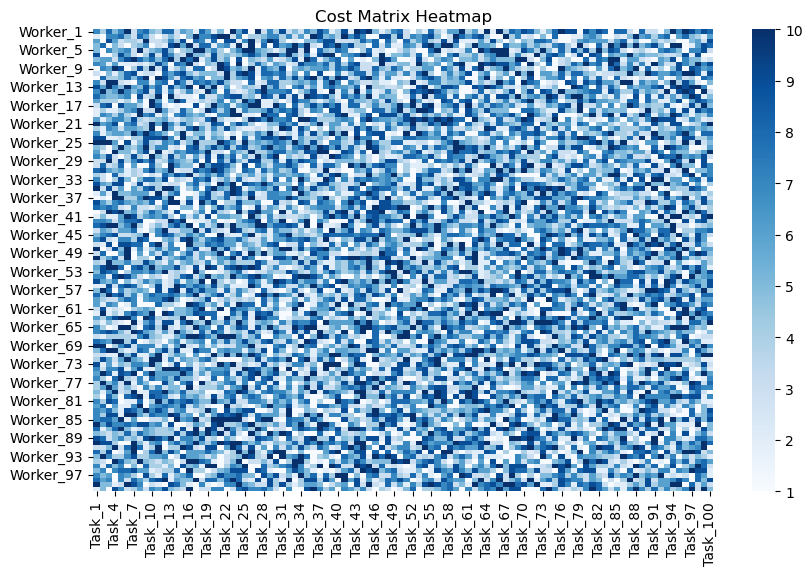

In [3]:
# Summary statistics
display(df.describe())

# Null check
print("\nMissing values in each column:")
display(df.isnull().sum())

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, cmap='Blues', annot=False)
plt.title('Cost Matrix Heatmap')
plt.show()

## Step 3: Data Cleaning

In [4]:
# Drop NaNs if any
df_clean = df.dropna()
print(f"Data shape after cleaning: {df_clean.shape}")

Data shape after cleaning: (100, 100)


##  Step 4: Data Preprocessing

In [5]:
# Ensure square matrix (Hungarian algo requirement)
min_dim = min(df_clean.shape)
df_square = df_clean.iloc[:min_dim, :min_dim]
print(f"Square matrix shape used: {df_square.shape}")

Square matrix shape used: (100, 100)


## Step 5: Solve Assignment Problem (Hungarian Algorithm)

In [6]:
row_ind, col_ind = linear_sum_assignment(df_square.values)

assignments = list(zip(df_square.index[row_ind], df_square.columns[col_ind]))
costs = df_square.values[row_ind, col_ind]
total_cost = costs.sum()

result_df = pd.DataFrame(assignments, columns=["Worker", "Task"])
result_df["Cost"] = costs
result_df["TotalCost"] = total_cost
result_df.head()

,Worker,Task,Cost,TotalCost
0,Worker_1,Task_22,1,100
1,Worker_2,Task_2,1,100
2,Worker_3,Task_16,1,100
3,Worker_4,Task_93,1,100
4,Worker_5,Task_14,1,100


## Step 6: Evaluation & Summary

In [7]:
print(f"✅ Total Assignment Cost: {total_cost}")
display(result_df)

✅ Total Assignment Cost: 100


,Worker,Task,Cost,TotalCost
0,Worker_1,Task_22,1,100
1,Worker_2,Task_2,1,100
2,Worker_3,Task_16,1,100
3,Worker_4,Task_93,1,100
4,Worker_5,Task_14,1,100
...,...,...,...,...
95,Worker_96,Task_86,1,100
96,Worker_97,Task_4,1,100
97,Worker_98,Task_83,1,100
98,Worker_99,Task_96,1,100


## Step 7: Save Results

In [9]:
output_path = '../data/processed/assignment_result.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
result_df.to_csv(output_path, index=False)
print(f"Results saved to: {output_path}")

Results saved to: ../data/processed/assignment_result1.csv
